In [1]:
import numpy as np
import pandas as pd
from glob import glob

files = glob('Z:\Descargas\composite\deepl\CSV_DATA_RESAMPLED\*.csv')
np.random.shuffle(files)

n_files = 4000 # 80% de los datos correctos

df_list = []

for file in files:
    df = pd.read_csv(file)
    if df.iloc[:,-1][0] == 1:
        df_list.append(df)
    if len(df_list) == n_files:
        break
        
print(len(df_list))

4000


In [2]:
df = pd.concat(df_list)
df = df.iloc[:,:-1]
df

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,7.034383e-07,1543.324782,1772.288307,1886.529876,1912.366838,1864.336851,1771.830388,2268.827427,1892.685412,1930.910785,...,2310.272143,2229.911612,2085.704874,1969.074437,1878.408926,2180.489964,2554.804622,2897.749121,2540.046026,2156.790992
1,7.189177e-07,-542.714589,-616.272602,-658.406604,-674.288290,-671.401235,-661.322357,-833.235128,-669.931542,-669.531872,...,-804.258295,-790.066691,-751.005937,-722.774805,-650.280927,-756.938226,-894.199740,-1021.262841,-900.531426,-767.729889
2,8.641277e-07,296.807863,331.238426,354.173501,365.711236,370.736897,376.790503,482.786414,370.263073,359.336260,...,433.635957,433.837015,418.936115,411.244126,350.281904,408.699081,488.036607,562.370389,497.689368,424.712939
3,8.048442e-07,-192.187884,-209.805617,-224.192783,-233.280965,-240.629653,-252.231262,-334.110254,-243.033600,-227.467043,...,-275.926673,-281.527247,-276.299156,-276.907010,-223.433422,-261.154805,-315.816496,-367.661538,-326.179480,-278.152274
4,1.150262e-06,135.429097,143.926732,153.562881,161.060910,169.191998,183.216948,253.444507,174.120304,156.065016,...,190.437774,198.581740,198.301366,203.191404,155.055096,181.426985,222.618524,262.156298,233.007671,198.324174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-7.835481e-09,53134.970844,56615.611825,56893.053379,55191.382024,50150.964774,41077.950063,71167.032365,63065.665660,61974.918640,...,64660.225970,58329.310158,50865.502905,46935.488537,73081.553505,72289.395306,74873.806915,77747.830668,64908.874618,51983.637429
828,8.578725e-09,52332.178138,55762.796138,56077.389178,54452.310852,49595.246621,40855.862107,70127.027125,62080.660857,61009.642441,...,63752.690520,57577.971723,50284.085374,46455.211447,71648.449380,71012.792941,73701.077846,76630.207254,64031.433763,51342.003856
829,-9.792302e-09,53548.584310,57158.407888,57578.499856,55998.812101,51187.010424,42496.568851,71525.678488,63498.988773,62494.189682,...,65332.509123,59108.299422,51754.753486,47885.081440,73500.255760,72761.654505,75390.783091,78289.322829,65560.821182,52711.022628
830,1.214295e-08,52361.123122,55966.051175,56508.424651,55095.442845,50649.003689,42614.423398,69857.493927,62037.928456,61120.412560,...,64049.089715,58117.871425,51088.303279,47396.217936,71532.819064,70958.479303,73651.461987,76559.740900,64294.755940,51881.976052


In [3]:
df.to_csv('Z:\\Descargas\\composite\\deepl\\train_correct_cnn.csv', index=False)

### **Normalizar los datos con MinMaxScaler**

In [4]:
import pandas as pd

train = pd.read_csv('Z:\\Descargas\\composite\\deepl\\train_correct_cnn.csv')
train.shape

(3328000, 29)

In [5]:
train

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,7.034383e-07,1543.324782,1772.288307,1886.529876,1912.366838,1864.336851,1771.830388,2268.827427,1892.685412,1930.910785,...,2310.272143,2229.911612,2085.704874,1969.074437,1878.408926,2180.489964,2554.804622,2897.749121,2540.046026,2156.790992
1,7.189177e-07,-542.714589,-616.272602,-658.406604,-674.288290,-671.401235,-661.322357,-833.235128,-669.931542,-669.531872,...,-804.258295,-790.066691,-751.005937,-722.774805,-650.280927,-756.938226,-894.199740,-1021.262841,-900.531426,-767.729889
2,8.641277e-07,296.807863,331.238426,354.173501,365.711236,370.736897,376.790503,482.786414,370.263073,359.336260,...,433.635957,433.837015,418.936115,411.244126,350.281904,408.699081,488.036607,562.370389,497.689368,424.712939
3,8.048442e-07,-192.187884,-209.805617,-224.192783,-233.280965,-240.629653,-252.231262,-334.110254,-243.033600,-227.467043,...,-275.926673,-281.527247,-276.299156,-276.907010,-223.433422,-261.154805,-315.816496,-367.661538,-326.179480,-278.152274
4,1.150262e-06,135.429097,143.926732,153.562881,161.060910,169.191998,183.216948,253.444507,174.120304,156.065016,...,190.437774,198.581740,198.301366,203.191404,155.055096,181.426985,222.618524,262.156298,233.007671,198.324174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327995,-7.835481e-09,53134.970844,56615.611825,56893.053379,55191.382024,50150.964774,41077.950063,71167.032365,63065.665660,61974.918640,...,64660.225970,58329.310158,50865.502905,46935.488537,73081.553505,72289.395306,74873.806915,77747.830668,64908.874618,51983.637429
3327996,8.578725e-09,52332.178138,55762.796138,56077.389178,54452.310852,49595.246621,40855.862107,70127.027125,62080.660857,61009.642441,...,63752.690520,57577.971723,50284.085374,46455.211447,71648.449380,71012.792941,73701.077846,76630.207254,64031.433763,51342.003856
3327997,-9.792302e-09,53548.584310,57158.407888,57578.499856,55998.812101,51187.010424,42496.568851,71525.678488,63498.988773,62494.189682,...,65332.509123,59108.299422,51754.753486,47885.081440,73500.255760,72761.654505,75390.783091,78289.322829,65560.821182,52711.022628
3327998,1.214295e-08,52361.123122,55966.051175,56508.424651,55095.442845,50649.003689,42614.423398,69857.493927,62037.928456,61120.412560,...,64049.089715,58117.871425,51088.303279,47396.217936,71532.819064,70958.479303,73651.461987,76559.740900,64294.755940,51881.976052


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
train.shape

(3328000, 29)

### **Definir modelo CNN-AutoEncoder**

In [7]:
# reshape input into [samples, timesteps, features]

n_samples = 4000
n_steps = 832
n_features = train.shape[1]
train = train.reshape((n_samples, n_steps, n_features))

train.shape

(4000, 832, 29)

In [47]:
from tensorflow.keras import models, layers

model = models.Sequential([
    # encoder
    layers.Conv1D(16, 3, activation='relu', padding='same', input_shape=(train.shape[1], train.shape[2])),
    layers.MaxPooling1D(2),
    layers.Conv1D(8, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    # decoder
    layers.Conv1D(8, 3, activation='relu', padding='same'),
    layers.UpSampling1D(2),
    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.UpSampling1D(2),
    layers.Conv1D(29, 3, activation='relu', padding='same')
])

model.compile(optimizer='rmsprop', loss='mae')
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 832, 16)           1408      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 416, 16)           0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 416, 8)            392       
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 208, 8)            0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 208, 8)            200       
_________________________________________________________________
up_sampling1d_30 (UpSampling (None, 416, 8)            0         
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 416, 16)         

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)]

history = model.fit(train, train, callbacks=early_stop, epochs=50, batch_size=64, validation_split=0.1)

Train on 3600 samples, validate on 400 samples
Epoch 1/50
3600/3600 [==============================] - 3s 896us/sample - loss: 0.0239 - val_loss: 0.0139
Epoch 2/50
3600/3600 [==============================] - 1s 274us/sample - loss: 0.0143 - val_loss: 0.0155
Epoch 3/50
3600/3600 [==============================] - 1s 282us/sample - loss: 0.0139 - val_loss: 0.0114
Epoch 4/50
3600/3600 [==============================] - 1s 275us/sample - loss: 0.0136 - val_loss: 0.0155
Epoch 5/50
3600/3600 [==============================] - 1s 275us/sample - loss: 0.0133 - val_loss: 0.0102
Epoch 6/50
3600/3600 [==============================] - 1s 279us/sample - loss: 0.0072 - val_loss: 0.0069
Epoch 7/50
3600/3600 [==============================] - 1s 276us/sample - loss: 0.0054 - val_loss: 0.0040
Epoch 8/50
3600/3600 [==============================] - 1s 277us/sample - loss: 0.0051 - val_loss: 0.0060
Epoch 9/50
3600/3600 [==============================] - 1s 273us/sample - loss: 0.0051 - val_loss: 0.0059

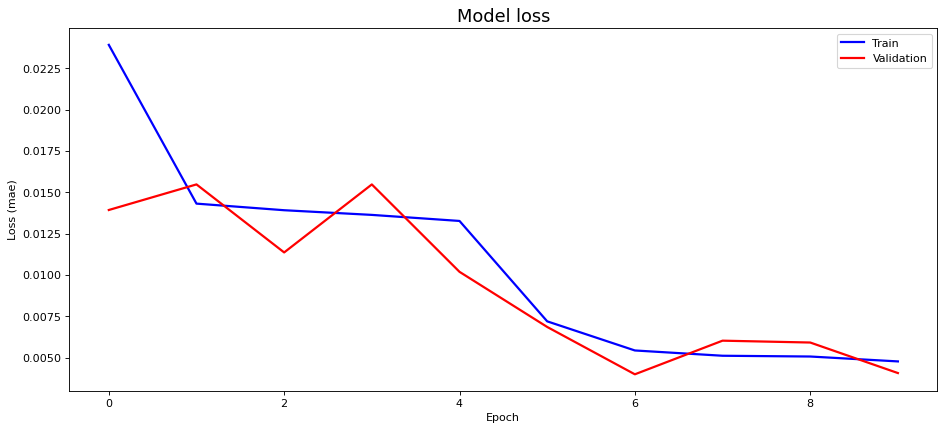

In [49]:
from matplotlib import pyplot as plt

# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [50]:
import numpy as np

pred_train = model.predict(train)

mean = np.mean(np.abs(pred_train-train), axis=2)
print(mean.shape)
mean = np.mean(mean, axis=1)
print(mean.shape)

threshold = mean.mean()+3*mean.std()
threshold

(4000, 832)
(4000,)


0.004229910918147456

In [56]:
test = pd.read_csv('Z:\\Descargas\\composite\\deepl\\test_incorrect_cnn.csv')
test

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.416676e-07,7048.882046,7145.872358,7173.727983,7131.462497,7045.744004,6905.154275,7043.221590,7085.187871,7076.402299,...,6870.560104,6662.019014,6409.987574,6190.707646,7100.078202,7106.648754,7074.015503,6811.865500,6452.676887,5991.285311
1,7.224021e-07,-2430.277061,-2466.774195,-2483.226450,-2469.694165,-2446.189347,-2407.933083,-2448.444967,-2453.719906,-2448.014625,...,-2384.325088,-2314.454967,-2230.762047,-2146.568652,-2433.871156,-2446.192869,-2439.477774,-2359.822838,-2245.064504,-2095.529789
2,8.047984e-07,1375.134630,1397.577745,1410.949613,1403.467431,1393.654354,1378.294246,1398.818379,1395.222497,1389.607452,...,1355.492947,1315.036317,1267.304191,1212.613744,1367.697893,1380.528410,1378.773185,1337.735852,1274.760542,1191.094089
3,8.356827e-07,-936.658903,-953.239445,-965.249822,-960.191153,-955.982993,-950.021173,-962.478432,-955.209681,-949.623443,...,-927.340790,-898.723041,-865.598824,-823.265024,-924.794635,-937.604698,-937.705401,-912.161411,-869.994175,-812.752225
4,1.117156e-06,701.086562,714.527132,725.790897,722.012750,720.799462,719.836242,727.901226,718.732885,713.230522,...,697.248413,674.913812,649.621069,614.139218,687.015447,699.699904,700.727033,683.383907,652.249736,609.008016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327995,-7.004268e-09,56608.181111,64381.580400,69327.567187,70934.290047,70177.762921,67035.310056,74905.081774,69182.422883,70465.126689,...,79005.479487,78950.903607,79155.162508,85281.429411,71946.482202,76275.502277,83007.559763,89531.628719,83849.843814,77744.648264
3327996,8.684350e-09,56020.690471,63551.327335,68318.983974,69844.683109,69079.497951,65970.076792,73867.056469,68246.476695,69456.009900,...,77733.528552,77676.603876,77870.039656,83853.510972,70865.877563,75117.067229,81705.771279,88092.005214,82493.605725,76484.576378
3327997,-1.121551e-08,58342.321496,65664.268818,70280.790517,71707.256598,70853.413527,67625.585404,75757.137706,70244.984205,71454.792793,...,79678.091713,79561.940759,79715.966561,85782.249425,72578.950371,76938.037634,83645.575707,90111.379076,84406.563556,78259.986109
3327998,1.558949e-08,57304.926111,64212.204256,68532.402222,69830.451027,68961.166202,65792.375848,73875.464827,68577.398452,69693.026572,...,77494.899963,77367.678132,77496.336596,83336.606033,70670.762209,74904.836657,81380.765082,87616.239963,82060.679932,76080.210817


In [57]:
test = scaler.transform(test)
test = test.reshape((n_files, n_steps, n_features))

pred_test = model.predict(test)

In [58]:
draw_train = np.mean(np.abs(pred_train-train), axis=1)
draw_train = np.mean(draw_train, axis=1)

draw_test = np.mean(np.abs(pred_test-test), axis=1)
draw_test = np.mean(draw_test, axis=1)

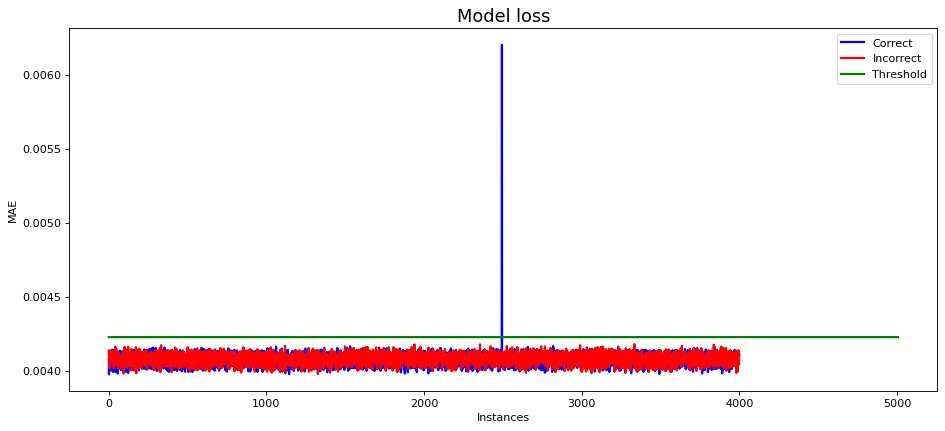

In [59]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(draw_train, 'b', label='Correct', linewidth=2)
ax.plot(draw_test, 'r', label='Incorrect', linewidth=2)
ax.plot(np.full(shape=5007, fill_value=threshold), 'g', label='Threshold', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('MAE')
ax.set_xlabel('Instances')
ax.legend(loc='upper right')
plt.show()